In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
mojo_2014=pd.read_csv("Box Office Mojo 2014.csv")
mojo_2015=pd.read_csv("Box Office Mojo 2015.csv")
mojo_2016=pd.read_csv("Box Office Mojo 2016.csv")
mojo_2017=pd.read_csv("Box Office Mojo 2017.csv")
mojo_2018=pd.read_csv("Box Office Mojo 2018.csv")

year_df=pd.concat([mojo_2014, mojo_2015, mojo_2016, mojo_2017, mojo_2018])
year_df=year_df.rename(columns={"Movie Title": "Title"})
year_df=year_df[["Title", "Total Gross", "Release Date", "Year"]]
year_df.head()

,Title,Total Gross,Release Date,Year
0,Guardians of the Galaxy,"$333,176,600",Aug 1,2014
1,The Hunger Games: Mockingjay - Part 1,"$337,135,885",Nov 21,2014
2,Captain America: The Winter Soldier,"$259,766,572",Apr 4,2014
3,The Lego Movie,"$257,760,692",Feb 7,2014
4,Transformers: Age of Extinction,"$245,439,076",Jun 27,2014


In [3]:
movie_collect=pd.read_csv("Movie Collection Data.csv")
movie_collect=movie_collect[["title", "genres", "budget", "revenue", "runtime"]]
movie_collect=movie_collect.rename(columns={"title": "Title", "genres": "Genre", "budget": "Budget", 
                                            "revenue": "Revenue", "runtime": "Runtime"})
movie_collect.head()



C:\Users\mrose2\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Title,Genre,Budget,Revenue,Runtime
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,373554033.0,81.0
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,262797249.0,104.0
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,0.0,101.0
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,81452156.0,127.0
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",0,76578911.0,106.0


In [4]:
for i in range(len(movie_collect)):
    first_find = movie_collect["Genre"][i].find("'name':") + 9
    second_find = movie_collect["Genre"][i].find("}") - 1
    movie_collect["Genre"][i] = movie_collect["Genre"][i][first_find:second_find]


C:\Users\mrose2\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
year_collect_df=pd.merge(year_df, movie_collect, on="Title", how= "left")
year_collect_df=year_collect_df.loc[year_collect_df["Budget"] != "0"]

In [6]:
opening_data= pd.read_csv("Box Office Mojo Opening Data.csv")
opening_data=opening_data[["Movie Title", "Opening Amount", "Production Company"]]
opening_data["Production Company"]=opening_data["Production Company"].str.replace("\n\n", "")
opening_data=opening_data.rename(columns={"Movie Title": "Title"})

In [7]:
mojo_merged=pd.merge(year_collect_df, opening_data, on= "Title", how= "left")

In [8]:
mojo_merged=mojo_merged.dropna()
mojo_merged=mojo_merged[["Title", "Production Company", "Genre", "Runtime", "Release Date", "Year", "Budget", "Opening Amount", "Total Gross", "Revenue"]]
mojo_merged=mojo_merged.set_index("Title")
mojo_merged["Budget"]=mojo_merged["Budget"].astype(int)
mojo_merged["Budget"]=mojo_merged["Budget"].map('${:,.0f}'.format)
mojo_merged["Revenue"]=mojo_merged["Revenue"].astype(int)
mojo_merged["Revenue"]=mojo_merged["Revenue"].map('${:,.0f}'.format)
mojo_merged

,Production Company,Genre,Runtime,Release Date,Year,Budget,Opening Amount,Total Gross,Revenue
Title,,,,,,,,,
Guardians of the Galaxy,Walt Disney Studios Motion Pictures,Action,121.0,Aug 1,2014,"$170,000,000","$94,320,883","$333,176,600","$773,328,629"
The Hunger Games: Mockingjay - Part 1,Lionsgate,Science Fiction,123.0,Nov 21,2014,"$125,000,000","$121,897,634","$337,135,885","$752,100,229"
Captain America: The Winter Soldier,Walt Disney Studios Motion Pictures,Action,136.0,Apr 4,2014,"$170,000,000","$95,023,721","$259,766,572","$714,766,572"
The Lego Movie,Warner Bros.,Adventure,100.0,Feb 7,2014,"$60,000,000","$69,050,279","$257,760,692","$469,160,692"
Transformers: Age of Extinction,Paramount Pictures,Science Fiction,165.0,Jun 27,2014,"$210,000,000","$100,038,390","$245,439,076","$1,091,405,097"
...,...,...,...,...,...,...,...,...,...
Skyscraper,Universal Pictures,Comedy,90.0,Jul 13,2018,"$650,000","$24,905,015","$68,420,120",$0
Robin Hood,Universal Pictures,Animation,83.0,Nov 21,2018,"$15,000,000","$36,063,385","$30,824,628","$32,056,467"
Robin Hood,Universal Pictures,Action,140.0,Nov 21,2018,"$200,000,000","$36,063,385","$30,824,628","$310,669,540"


In [9]:
mojo_merged["Total Gross"]=mojo_merged["Total Gross"].str.replace("$", "")
mojo_merged["Total Gross"]=mojo_merged["Total Gross"].str.replace(",", "")
mojo_merged["Opening Amount"]=mojo_merged["Opening Amount"].str.replace("$", "")
mojo_merged["Opening Amount"]=mojo_merged["Opening Amount"].str.replace(",", "")
mojo_merged["Budget"]=mojo_merged["Budget"].str.replace("$", "")
mojo_merged["Budget"]=mojo_merged["Budget"].str.replace(",", "")
mojo_merged["Revenue"]=mojo_merged["Revenue"].str.replace("$", "")
mojo_merged["Revenue"]=mojo_merged["Revenue"].str.replace(",", "")

mojo_merged.to_csv("Merged Movie Data.csv")

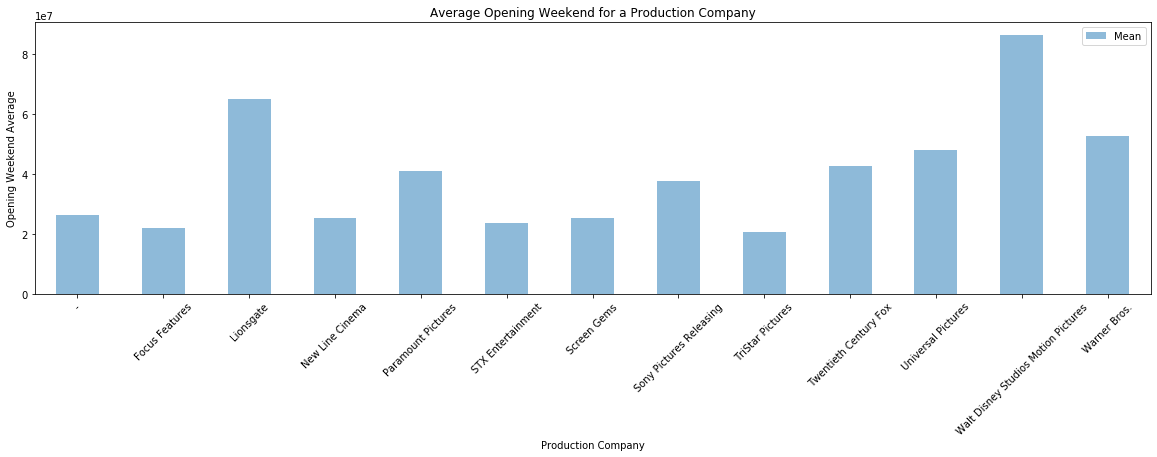

In [116]:
mojo_merged["Opening Amount"]=mojo_merged["Opening Amount"].astype(int)

avg_opening=mojo_merged.groupby("Production Company")["Opening Amount"].mean()
company_avg= pd.DataFrame({"Mean": avg_opening})

bar=company_avg.plot(kind="bar", alpha= 0.5, align= "center", title= "Average Opening Weekend for a Production Company",
                    figsize= (20,5), rot= 45)
bar.set_ylabel("Opening Weekend Average")
#plt.savefig("Average Opening Weekend/Per Production Company.png")
plt.show()

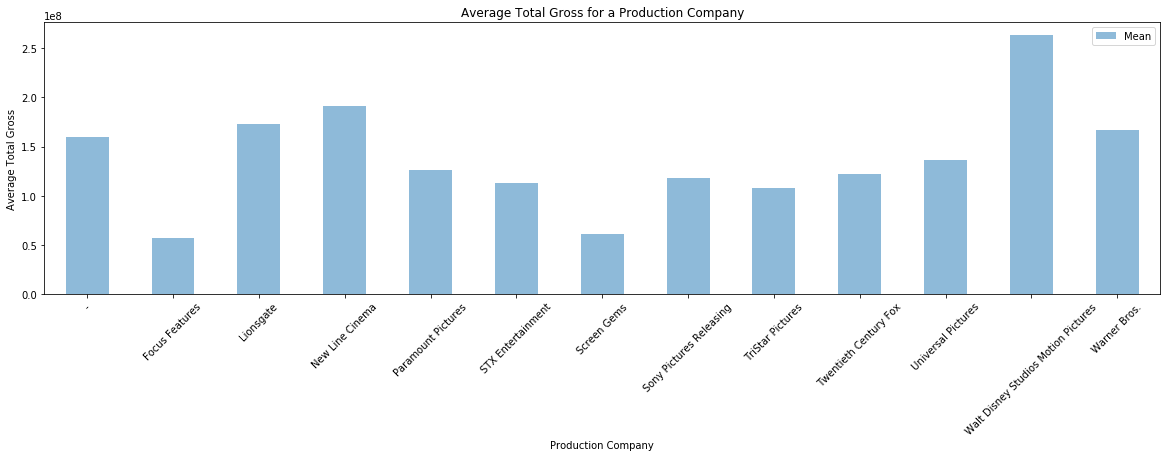

In [117]:
mojo_merged["Total Gross"]=mojo_merged["Total Gross"].astype(int)

avg_gross=mojo_merged.groupby("Production Company")["Total Gross"].mean()
company_gross_avg= pd.DataFrame({"Mean": avg_gross})

bar=company_gross_avg.plot(kind="bar", alpha= 0.5, align= "center", title= "Average Total Gross for a Production Company",
                    figsize= (20,5), rot= 45)
bar.set_ylabel("Average Total Gross")
#plt.savefig("Average Opening Weekend/Per Production Company.png")
plt.show()

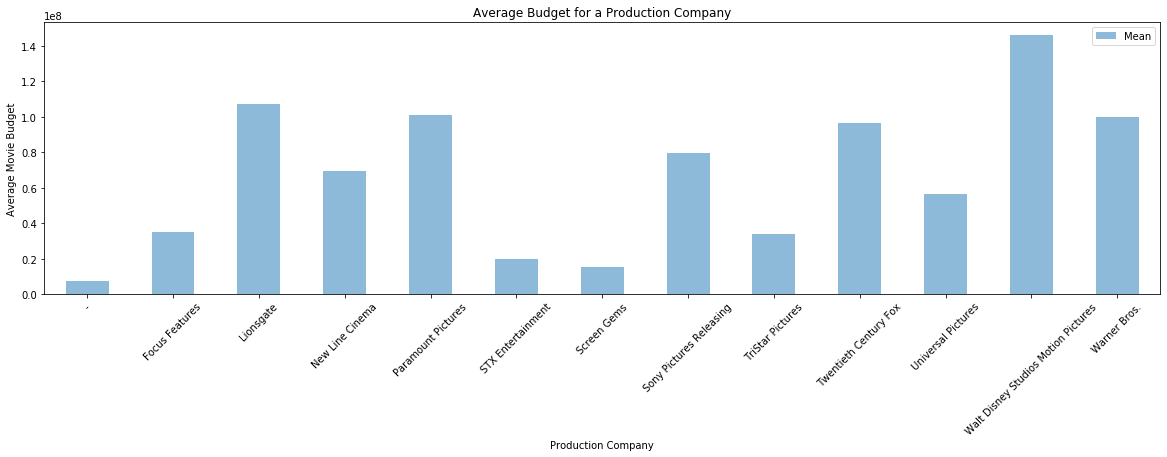

In [118]:
mojo_merged["Budget"]=mojo_merged["Budget"].astype(int)
avg_budget=mojo_merged.groupby("Production Company")["Budget"].mean()
company_budget_avg= pd.DataFrame({"Mean": avg_budget})

bar=company_budget_avg.plot(kind="bar", alpha= 0.5, align= "center", title= "Average Budget for a Production Company",
                    figsize= (20,5), rot= 45)
bar.set_ylabel("Average Movie Budget")
#plt.savefig("Average Opening Weekend/Per Production Company.png")
plt.show()

In [110]:
company_summary=pd.DataFrame({"Gross":avg_gross, "Budget":avg_budget, "Opening Amount":avg_opening})
company_summary["Budget"]=company_summary["Budget"].astype(int)
company_summary["Budget"]=company_summary["Budget"].map('${:,.0f}'.format)
company_summary["Gross"]=company_summary["Gross"].astype(int)
company_summary["Gross"]=company_summary["Gross"].map('${:,.0f}'.format)
company_summary["Opening Amount"]=company_summary["Opening Amount"].astype(int)
company_summary["Opening Amount"]=company_summary["Opening Amount"].map('${:,.0f}'.format)
#company_summary.sort_values(by=["Gross"], ascending=False)
company_summary

,Gross,Budget,Opening Amount
Production Company,,,
-,"$159,342,015","$7,650,000","$26,362,367"
Focus Features,"$57,371,409","$35,000,000","$22,164,171"
Lionsgate,"$172,875,773","$107,142,857","$64,992,578"
New Line Cinema,"$191,204,754","$69,250,000","$25,398,367"
Paramount Pictures,"$126,361,890","$101,104,166","$40,883,426"
STX Entertainment,"$113,257,297","$20,000,000","$23,817,340"
Screen Gems,"$61,373,235","$15,228,571","$25,191,522"
Sony Pictures Releasing,"$117,647,803","$79,781,250","$37,619,739"
TriStar Pictures,"$107,825,862","$34,000,000","$20,553,320"


The r-squared is: 0.42840743057205094


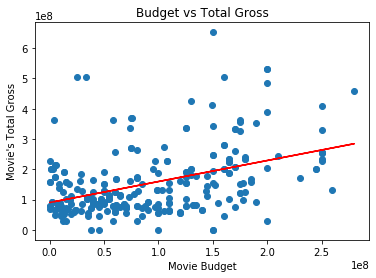

In [90]:
mojo_merged["Budget"]=mojo_merged["Budget"].astype(int)

y_values = mojo_merged["Total Gross"]
x_values = mojo_merged["Budget"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Budget vs Total Gross")
plt.xlabel("Movie Budget")
plt.ylabel("Movie's Total Gross")
print(f"The r-squared is: {rvalue}")
#plt.savefig("Budget vs Total Gross.png")
plt.show()

The r-squared is: 0.20924927341879165


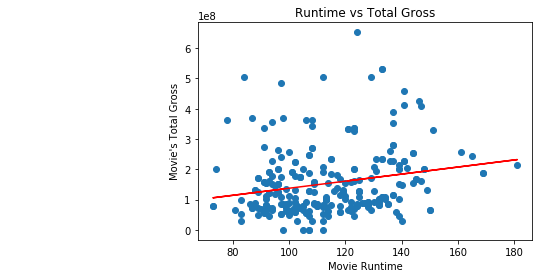

In [70]:
y_values = mojo_merged["Total Gross"]
x_values = mojo_merged["Runtime"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Runtime vs Total Gross")
plt.xlabel("Movie Runtime")
plt.ylabel("Movie's Total Gross")
print(f"The r-squared is: {rvalue}")
#plt.savefig("Runtime vs Total Gross.png")
plt.show()

The r-squared is: 0.9035962103630144


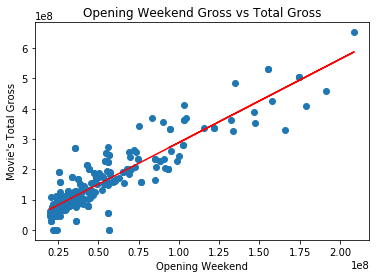

In [71]:
y_values = mojo_merged["Total Gross"]
x_values = mojo_merged["Opening Amount"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Opening Weekend Gross vs Total Gross")
plt.xlabel("Opening Weekend")
plt.ylabel("Movie's Total Gross")
print(f"The r-squared is: {rvalue}")
plt.savefig("Opening Weekend Gross vs Total Gross.png")
plt.show()

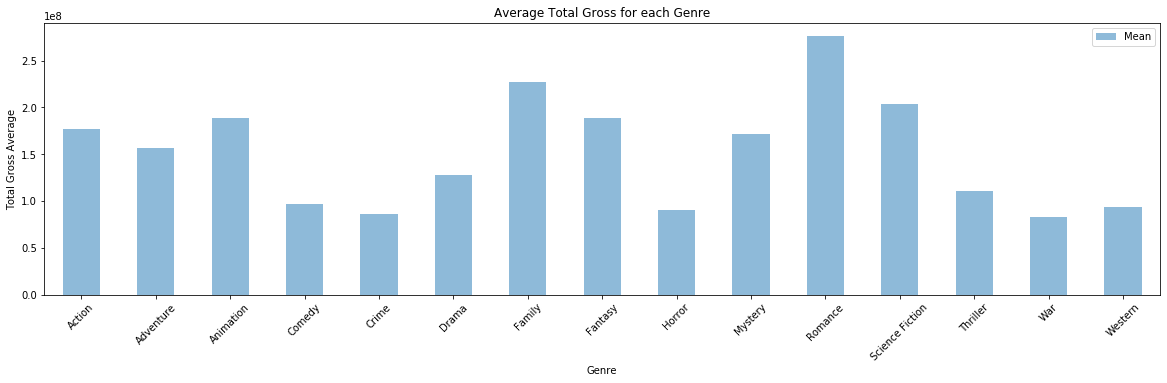

In [72]:
avg_genre=mojo_merged.groupby("Genre")["Total Gross"].mean()
genre_avg= pd.DataFrame({"Mean": avg_genre})

bar=genre_avg.plot(kind="bar", alpha= 0.5, align= "center", title= "Average Total Gross for each Genre",
                    figsize= (20,5), rot= 45)
bar.set_ylabel("Total Gross Average")
#plt.savefig("Average Gross Per Genre.png")
plt.show()

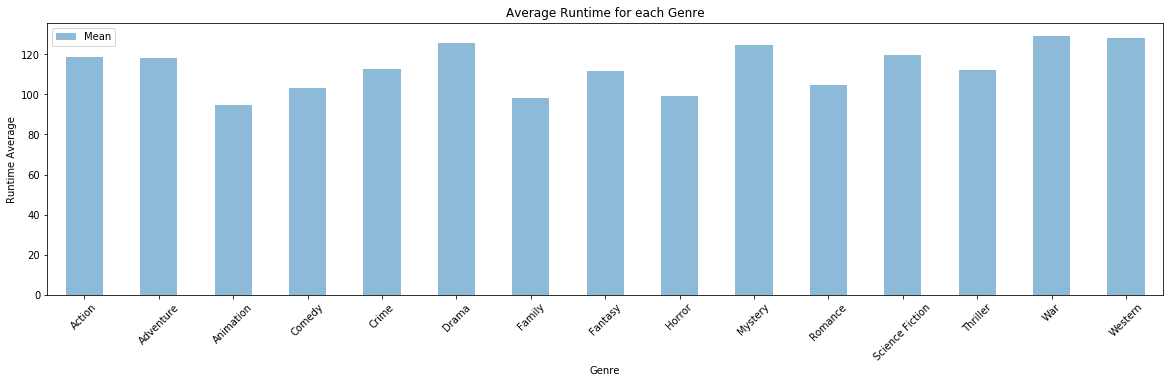

In [86]:
avg_genre_run=mojo_merged.groupby("Genre")["Runtime"].mean()
genre_run_avg= pd.DataFrame({"Mean": avg_genre_run})

#genre_run_avg = genre_run_avg.sort_values(by = ['Genre'], ascending=False)

bar=genre_run_avg.plot(kind="bar", alpha=0.5, align= "center", title= "Average Runtime for each Genre",
                    figsize= (20,5), rot= 45)
bar.set_xlabel("Genre")
bar.set_ylabel("Runtime Average")

plt.savefig("Average Runtime Per Genre.png")
plt.show()